In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 1
#%aimport 

# Test ADALINE

In [2]:
import pickle

with open('../datasets/processed/trec2007-1607061515-features.dat', 'rb') as infile:
    X = pickle.load(infile)

with open('../datasets/processed/trec2007-1607061515-labels.dat', 'rb') as infile:
    Y = pickle.load(infile)

print('X is a %s \t %s' % (X.shape, type(X)))
print('Y is a %s \t %s' % (Y.shape, type(Y)))

X is a (75419, 10000) 	 <class 'numpy.ndarray'>
Y is a (75419, 1) 	 <class 'numpy.matrixlib.defmatrix.matrix'>


In [15]:
%aimport adaline
from adaline import max_iters

x = np.insert(X, 0, values=1, axis=1) # bias term
y = Y*2 - 1                           # Convert labels to 1 and -1

## reduce dataset to go faster during prototyping
N_keep = 20000
x = x[:N_keep]
y = y[:N_keep]

weights, cost, error = adaline.train_adaline(features=x, labels=y,
                                             rate=0.062,
                                             termination_condition=max_iters(50),
                                             verbose=True)

iteration 1:	cost = 1.000
iteration 2:	cost = 0.915
iteration 3:	cost = 0.845
iteration 4:	cost = 0.788
iteration 5:	cost = 0.741
iteration 6:	cost = 0.701
iteration 7:	cost = 0.668
iteration 8:	cost = 0.641
iteration 9:	cost = 0.618
iteration 10:	cost = 0.599
iteration 11:	cost = 0.584
iteration 12:	cost = 0.571
iteration 13:	cost = 0.561
iteration 14:	cost = 0.553
iteration 15:	cost = 0.547
iteration 16:	cost = 0.542
iteration 17:	cost = 0.540
iteration 18:	cost = 0.538
iteration 19:	cost = 0.538
iteration 20:	cost = 0.539
iteration 21:	cost = 0.540
iteration 22:	cost = 0.543
iteration 23:	cost = 0.547
iteration 24:	cost = 0.551
iteration 25:	cost = 0.557
iteration 26:	cost = 0.563
iteration 27:	cost = 0.569
iteration 28:	cost = 0.577
iteration 29:	cost = 0.585
iteration 30:	cost = 0.594
iteration 31:	cost = 0.603
iteration 32:	cost = 0.613
iteration 33:	cost = 0.624
iteration 34:	cost = 0.635
iteration 35:	cost = 0.647
iteration 36:	cost = 0.660
iteration 37:	cost = 0.673
iteration 

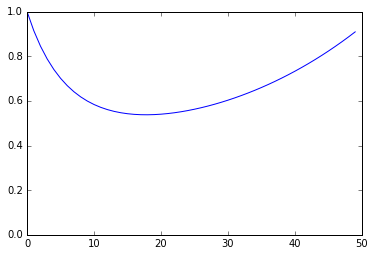

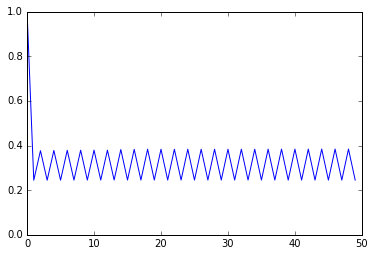

In [16]:
plt.plot(cost)
plt.ylim(0, cost[0])
plt.show()
plt.plot(error)
plt.ylim(0, error[0])
plt.show()

## Cost and error for 20000 datapoints and 10000 features

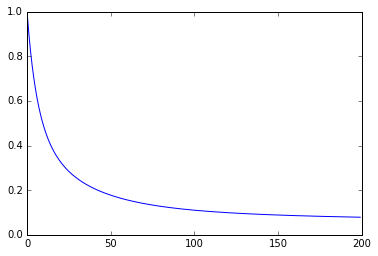

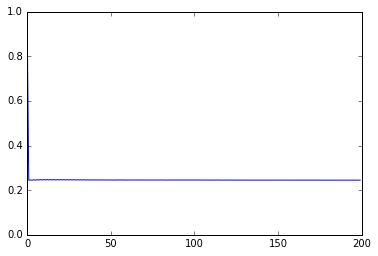

In [6]:
plt.plot(cost)
plt.ylim(0, cost[0])
plt.show()
plt.plot(error)
plt.ylim(0, error[0])
plt.show()

## Cost and error for the whole dataset and 10000 features

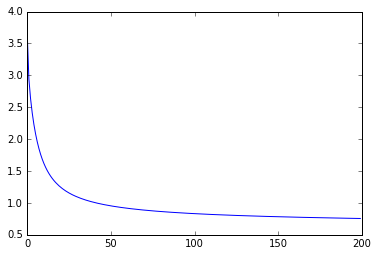

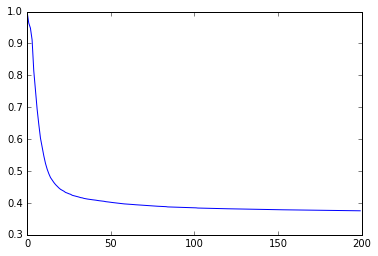

In [68]:
plt.plot(cost)
plt.show()
plt.plot(error)
plt.show()